# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)

from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Variables Declaration

In [3]:
# references to the past data file
file_path = '/content/drive/My Drive/DatasetTAfix.csv'

# Read and Load Past Data

In [4]:
# read and load past data
data = pd.read_csv(file_path, index_col='Hari_ke')
data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
317,12/1/2021,10047,7068,302,40,79
318,1/13/2021,11278,7657,306,27,78
319,1/14/2021,11557,7741,295,24,63
320,1/15/2021,12818,7491,238,25,80
321,1/16/2021,14224,8662,283,22,80


# Create Training Data, Validating Data and Forecasting Data

In [5]:
# create training data
train_data = data.loc[0:250]
train_data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
246,2/11/2020,2618,3624,101,19,43
247,3/11/2020,2973,3931,102,16,68
248,4/11/2020,3356,3785,113,14,60
249,5/11/2020,4065,3860,89,13,56
250,6/11/2020,3778,3563,94,15,65


In [6]:
# create validating data
valid_data = data.loc[251:len(data):]
valid_data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
317,12/1/2021,10047,7068,302,40,79
318,1/13/2021,11278,7657,306,27,78
319,1/14/2021,11557,7741,295,24,63
320,1/15/2021,12818,7491,238,25,80
321,1/16/2021,14224,8662,283,22,80


# Separate Data to X and Y Variable

In [7]:
x_train = train_data[['Meninggal','Sembuh','Virus Corona','PSBB']]
x_train.tail()

,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,
246,101,3624,43,19
247,102,3931,68,16
248,113,3785,60,14
249,89,3860,56,13
250,94,3563,65,15


In [8]:
# separate training data to Y variable
y_train = train_data[['Positif']]
y_train.tail()

,Positif
Hari_ke,
246,2618
247,2973
248,3356
249,4065
250,3778


In [9]:
# separate validating data to X variable
x_valid = valid_data[['Meninggal','Sembuh','Virus Corona','PSBB']]
x_valid.tail()

,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,
317,302,7068,79,40
318,306,7657,78,27
319,295,7741,63,24
320,238,7491,80,25
321,283,8662,80,22


In [10]:
# separate validating data to Y variable
y_valid = valid_data[['Positif']]
y_valid.tail()

,Positif
Hari_ke,
317,10047
318,11278
319,11557
320,12818
321,14224


# Prediction using Neural Networks

In [11]:
# scaling data using MinMaxScaler
y_train=np.reshape(y_train, (-1,1))
y_valid=np.reshape(y_valid, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(x_train))
x_train_scale=scaler_x.transform(x_train)

print(scaler_x.fit(x_valid))
x_valid_scale=scaler_x.transform(x_valid)

print(scaler_y.fit(y_train))
y_train_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_valid))
y_valid_scale=scaler_y.transform(y_valid)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [12]:
# number of features
num_features = 4
print('num of features = {0:1d}'.format(num_features))

# determining input neurons
input_neurons = num_features
print('input neurons = {0:1d}'.format(input_neurons))

# length of training data
len_train = len(x_train)
print('length of training data = {0:1d}'.format(len_train))

# determining factor (freely specify the number range from 1 to 10)
factor = 1

# determining output neurons
output_neurons = 1
print('output neurons = {0:1d}'.format(output_neurons))

# determining hidden neurons
hidden_neurons = int(len_train/factor) * (input_neurons + output_neurons)
print('hidden neurons = {0:1d}'.format(hidden_neurons))

num of features = 4
input neurons = 4
length of training data = 250
output neurons = 1
hidden neurons = 1250


In [13]:
# create a neural network sequential model
model = Sequential()
model.add(Dense(input_neurons, input_dim=input_neurons, kernel_initializer='normal', activation='relu'))
model.add(Dense(hidden_neurons, activation='relu'))
model.add(Dense(output_neurons, activation='linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1250)              6250      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1251      
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# compiling model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(x_train_scale, y_train_scale, epochs=2000, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/2000
2/2 [==============================] - 1s 601ms/step - loss: 0.1029 - mse: 0.1029 - mae: 0.2391 - val_loss: 0.6114 - val_mse: 0.6114 - val_mae: 0.7746
Epoch 2/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0828 - mse: 0.0828 - mae: 0.2054 - val_loss: 0.5492 - val_mse: 0.5492 - val_mae: 0.7334
Epoch 3/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.0707 - mse: 0.0707 - mae: 0.1915 - val_loss: 0.4844 - val_mse: 0.4844 - val_mae: 0.6877
Epoch 4/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0583 - mse: 0.0583 - mae: 0.1809 - val_loss: 0.4203 - val_mse: 0.4203 - val_mae: 0.6395
Epoch 5/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0490 - mse: 0.0490 - mae: 0.1735 - val_loss: 0.3602 - val_mse: 0.3602 - val_mae: 0.5907
Epoch 6/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.0457 - mse: 0.0457 - mae: 0.1770 - val_loss: 0.3092 - val_mse: 0.3092 - val_mae: 0.5457
Epoch 7/2000
2/2 [===

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


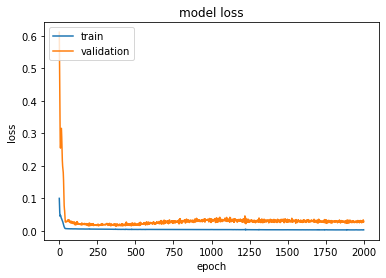

In [15]:
print(history.history.keys())
# plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
# Validating data using model
y_pred_scale = model.predict(x_valid_scale)

# The predictions are scaled back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scale)

df = pd.DataFrame({'Actual' : y_valid.values.flatten(),'Predicted' : y_pred.flatten()}) 
df = df.sort_index()
df.tail()

,Actual,Predicted
66,10047,10042.697266
67,11278,10322.573242
68,11557,7942.382812
69,12818,9440.857422
70,14224,10994.208984


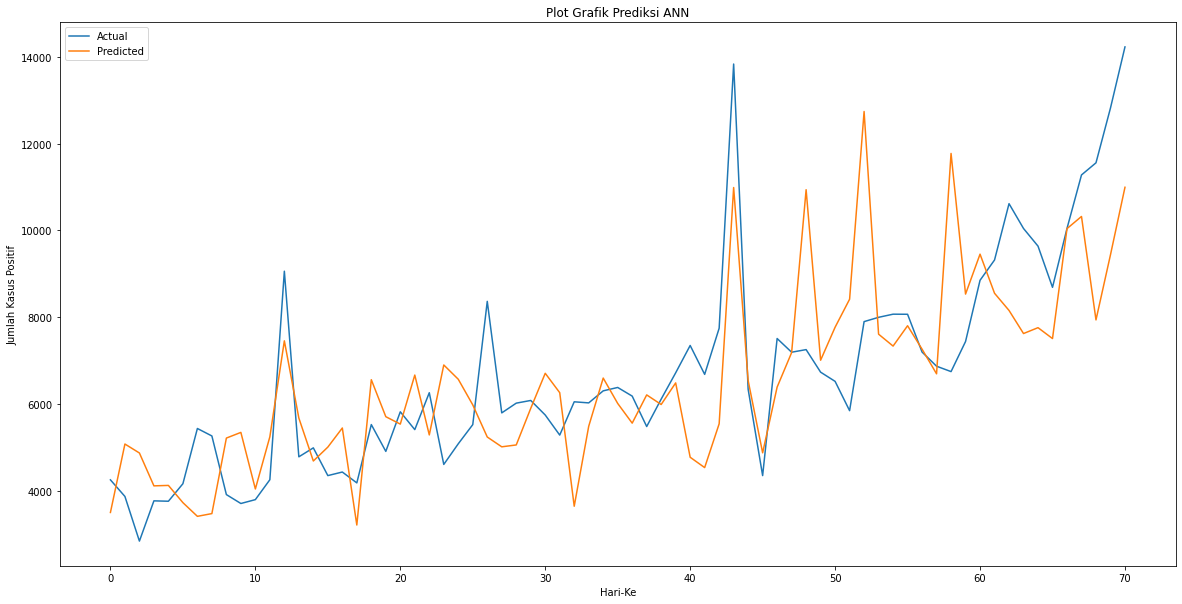

In [17]:
import matplotlib.pyplot as plt
df.plot(kind='line', 
             stacked=False,
             figsize=(20, 10),
             )
plt.title('Plot Grafik Prediksi ANN')
plt.ylabel('Jumlah Kasus Positif')
plt.xlabel('Hari-Ke')
plt.savefig('ANN-Covid.png')
plt.show()

# Evaluating Artificial Neural Network

In [18]:
import numpy as np
MAE = mean_absolute_error(y_valid,y_pred)
MSE = mean_squared_error(y_valid,y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((np.array(y_valid) - np.array(y_pred)) / np.array(y_valid))) * 100

print('MAE = {0:.4f} '.format(MAE))
print('MSE = {0:.4f} '.format(MSE))
print('RMSE = {0:.4f} '.format(RMSE))
print('MAPE = {0:.4f} '.format(MAPE))

MAE = 1293.2399 
MSE = 2944262.0098 
RMSE = 1715.8852 
MAPE = 19.8124 
